In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from IPython.display import display, Math
import sys
sys.path.append("..")
from exotop.model_1D import the_results as plottop
from exotop.model_1D import parameters as p
from exotop.model_1D import rheology as rh
from exotop.model_1D import inputs as ins
from exotop.model_1D import terrestrialplanet as tp
from exotop.model_1D import thermal as therm
from exotop.model_1D import topography as top
from exotop.useful_and_bespoke import colorize

# set paths
# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = 'latex/report-firstyr/figs/'

# set mpl display parameters
mpl.rcParams['axes.linewidth'] = 2  # set the value globally - for poster
rc('font',**{'family':'serif','serif':['Times New Roman']})  # latex font for matplotlib CMU Serif Roman
# rc('font',**{'family':'monospace','monospace':['Ubuntu Mono']})  # for computery poster 
rc('text', usetex=True)  # turn on for latexy font
matplotlib.font_manager._rebuild()

In [21]:
######  test effect of changing rheological parameters in 1D model
def plot_rheology_tradeoff(save=False, fig_path='figs/', fname='fig', zmin=None, zmax=None, 
                           zname=None, zlabel=None, clabelpad=1, zscale=1, res=30, **kwargs):
    names = {'T_m':('$T_m$ (K)',1), 
             'deltaT_m':(r'$\Delta T_m$ (K)', 1),
             'q_ubl':('$q_{u}$ (mW m$^{-2}$)',1e3), 
             'eta_m':('$\log_{10} \eta_m$',1), 
             'TBL_u':('$\delta_{u}$ (km)',1e-3),
             'Ra_i':('Ra',1),
             'd_m':('$d$ (km)',1e-3),
             'D_l':('$D_l$ (km)',1e-3),
            # 'urey':('Ur',1)
            }

    h = rh.grain_size(A_rh=8.7e15, eta_0=1e21, Ea=300e3, T_ref=1600, m=2.5, B_rh=0.5e-9, mu=80e9)
#     print('h =',h*1e3, 'mm for T_ref = 1600 and eta_ref = 1e21')

    defaults = dict(
     Alb=None, 
     H_0=4e-12, # final radiogenic heating in W/kg
     X_K=305, # initial abundance of K in wt ppm
     X_U=16e-3, # initial abundane of U in wt ppm 
     X_Th=56e-3, # initial abundance of Th in wt ppm 
     L=None, 
     Ra_crit_u=450, 
     R_p0=3400e3, 
     R_c0=1700e3,
     alpha_m=2.5e-5, # thermal expansivity
     k_m=4, # silicate thermal conductivity
     CMF=0.24, # not used
     rho_c=7200, # core density
     rho_m=3500, # mantle density 
     rho_lith=None, 
     c_m=1142, #<----??? TODO: check if you need constant volume c_p
     c_c=840, # specific heat for core in J/K/kg
     k_lm=4, # thermal conduvtivity lower mantle
     beta_u=None, # defaults to 1/3
     beta_c=None, # defaults to 1/3 
     a_rh=2.44, # for beta=1/3 
     Ea=300e3, # activation energy in J for viscosity law
     T_s=250, # fixed surface temp in K
     M_p=6.39e23, # only used for gravity in this case
     sma=None, 
     g_sfc = 3.7,
    mu=80e9, A_rh=8.7e15, 
    h_rh=2.07e-3,
    B_rh=0.5e-9, m_rh=2.5
     )
    run_kwargs = eval('ins.Venusbaseline_run')
    z_vec = np.linspace(zmin, zmax, num=res)
    cols = colorize(z_vec, cmap='rainbow')[0]
    for ii, zz in enumerate(z_vec):
        defaults.update({zname:zz})
        pl = tp.TerrestrialPlanet(**defaults)
        pl = therm.solve(pl, **run_kwargs) # T_m, T_c, D_l
        pl = top.topography(pl=pl, C=2.44, **run_kwargs)
        if ii==0:
            fig=None
            axes=None
        fig, axes = plottop.plot_output(pl, names, ncols=2, plots_save=save, fig=fig, axes=axes, 
                                fig_path=fig_path, legend=False, 
                                title='', line_args={'c':cols[ii]}, **kwargs)


    # plt.tight_layout()
    sc = fig.gca().scatter(None, None, vmin=zmin, vmax=zmax, cmap='rainbow')
    sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin=zmin*zscale, vmax=zmax*zscale))
    sm._A = []
    fig.subplots_adjust(right=0.85, wspace=0.5)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.04, 0.7])
    fig.colorbar(sm, cax=cbar_ax)
    cbar_ax.set_ylabel(zlabel, fontsize=labelsize, labelpad=clabelpad)
    cbar_ax.tick_params(axis='y', labelsize=ticksize) 
    if save:
        fig.savefig(fig_path+fname+'.pdf', bbox_inches='tight')
    return fig, axes


save=False
res=45
labelsize=23
ticksize=16
clabelpad=4

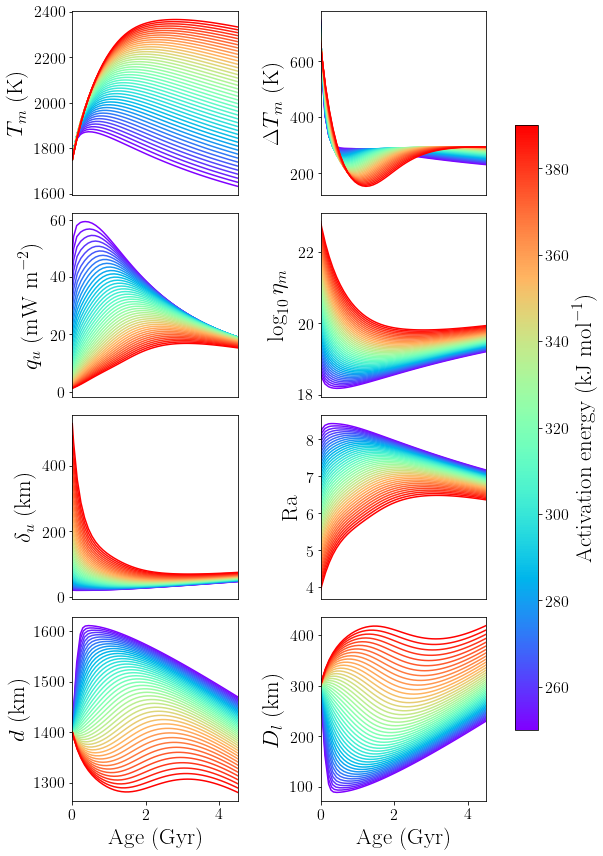

In [22]:
fig, axes = plot_rheology_tradeoff(save=save, res=res, fig_path=fig_path, fname='Ea-effect-evol', 
                                   zlabel='Activation energy (kJ mol$^{-1}$)', zname='Ea', 
                                   labelsize=labelsize, ticksize=ticksize, clabelpad=clabelpad,
                                   zmin=250e3, zmax=390e3, zscale=1e-3)

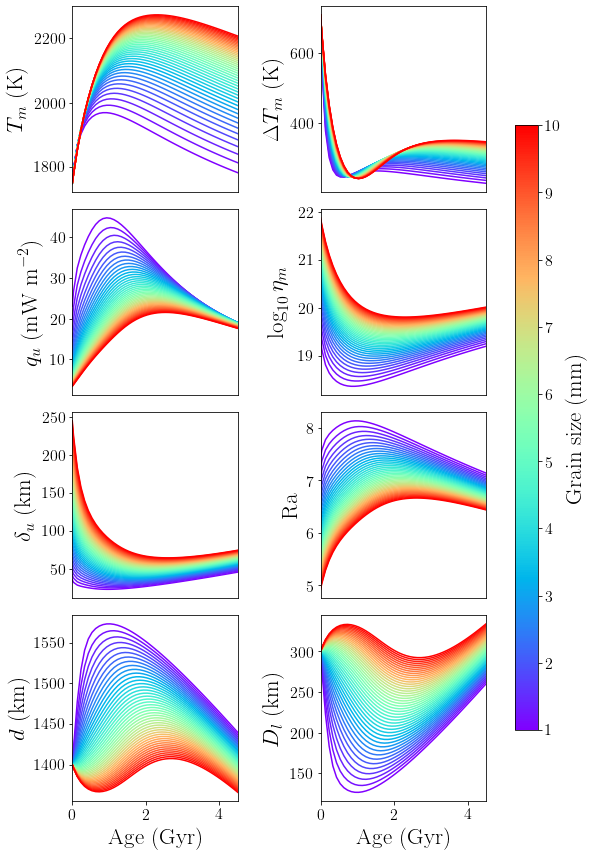

In [23]:
fig, axes = plot_rheology_tradeoff(save=save, res=res, fig_path=fig_path, fname='h-effect-evol', 
                                   zlabel='Grain size (mm)', zname='h_rh', 
                                   labelsize=labelsize, ticksize=ticksize,  clabelpad=clabelpad,
                                   zmin=1e-3, zmax=10e-3, zscale=1e3)

In [ ]:
fig, axes = plot_rheology_tradeoff(save=save, res=res, fig_path=fig_path, fname='a_rh-effect-evol', 
                                   zlabel='$a_{rh}$', zname='a_rh', 
                                   labelsize=labelsize, ticksize=ticksize,  clabelpad=clabelpad,
                                   zmin=2, zmax=4, zscale=1)